## MODEL Building (Over sampling dataset)

In [1]:
#importing modules
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,  auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing over sampling dataset
train_df = pd.read_csv(Path('Resources/cleaned-data/2019loans_os.csv'))
test_df = pd.read_csv(Path('Resources/cleaned-data/2020Q1loans_os.csv'))

In [3]:
# looking train data
train_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_status
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,n,27.24,0.0,0.0,...,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N,low_risk
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,n,20.23,0.0,0.0,...,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N,low_risk
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,n,24.26,0.0,0.0,...,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N,low_risk
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,n,31.44,0.0,1.0,...,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N,low_risk
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,n,18.76,0.0,1.0,...,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N,low_risk


In [4]:
# looking test data
test_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_status
0,40000.0,0.1033,856.40,RENT,128700.0,Source Verified,n,12.47,0.0,1.0,...,57.1,0.0,0.0,63915.0,49510.0,49400.0,14515.0,Y,N,low_risk
1,24450.0,0.1430,572.72,MORTGAGE,44574.0,Not Verified,n,15.05,0.0,1.0,...,0.0,0.0,0.0,136425.0,19439.0,15500.0,18925.0,N,N,low_risk
2,13500.0,0.1430,316.23,OWN,60000.0,Not Verified,n,28.72,0.0,0.0,...,0.0,0.0,0.0,82124.0,65000.0,5400.0,61724.0,Y,N,low_risk
3,10625.0,0.1774,268.31,RENT,60000.0,Verified,n,15.70,0.0,4.0,...,20.0,0.0,0.0,54855.0,50335.0,23200.0,26255.0,N,N,low_risk
4,6375.0,0.1862,232.46,RENT,60000.0,Source Verified,n,35.50,0.0,0.0,...,75.0,0.0,0.0,90445.0,56541.0,15300.0,72345.0,N,N,low_risk


In [5]:
#shape of training data
train_df.shape

(548144, 84)

In [6]:
#shape of test data
test_df.shape

(4702, 84)

In [7]:
#train_df.info()

In [8]:
train_df['loan_status'].value_counts()

low_risk     274072
high_risk    274072
Name: loan_status, dtype: int64

## Train and test set

In [9]:
# create feature matrix (X) #selecting all columns except 'loan_status'
X_train=train_df.drop('loan_status', axis=1) 
X_test=test_df.drop('loan_status', axis=1) 

# create response vector (y) ##selecting 'loan_status'
y_train=train_df['loan_status'].values  
y_test=test_df['loan_status'].values  

In [10]:
y_train

array(['low_risk', 'low_risk', 'low_risk', ..., 'high_risk', 'high_risk',
       'high_risk'], dtype=object)

## Converting categorical data to numeric

In [11]:
# Convert categorical data to numeric
X_train_dumy=pd.get_dummies(X_train)
X_test_dumy=pd.get_dummies(X_test)

In [12]:
#shape of test and train after pd.get_dummies
print(X_train_dumy.shape)
print(X_test_dumy.shape)

(548144, 92)
(4702, 91)


In [13]:
#adding the missing columns in test data(no dept_settlement_flag)
X_test_dumy['debt_settlement_flag_Y']=0

In [14]:
#shape of test and train after pd.get_dummies
print(X_train_dumy.shape)
print(X_test_dumy.shape)

(548144, 92)
(4702, 92)


## Scaling using StandardScalar

In [15]:
 # Converting output labels to 0 and 1
y_train_label = LabelEncoder().fit_transform(y_train)
y_train_label

array([1, 1, 1, ..., 0, 0, 0])

In [16]:
 # Converting output labels to 0 and 1
y_test_label = LabelEncoder().fit_transform(y_test)
y_test_label

array([1, 1, 1, ..., 0, 0, 0])

In [17]:
# Create a StandardScaler() model and fit it to the training data
X_scaler = StandardScaler().fit(X_train_dumy)

In [18]:
# Transform the training and testing data by using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train_dumy)
X_test_scaled = X_scaler.transform(X_test_dumy)

In [19]:
#shape of test and train after standard scalar
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(548144, 92)
(4702, 92)


## LogisticRegression

In [20]:
# Creating a Logistic Regression model on the scaled data
lr= LogisticRegression()

# Fit the model to the data
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [21]:
#printing the accuracy score
print(f'Training Score: {lr.score(X_train_scaled, y_train)}')
print(f'Testing Score: {lr.score(X_test_scaled, y_test)}')

Training Score: 0.710218482734464
Testing Score: 0.7662696724797958


In [22]:
#predection on the test set and confusion matrix
y_pred=lr.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[1785,  566],
       [ 533, 1818]])

In [23]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   high_risk       0.77      0.76      0.76      2351
    low_risk       0.76      0.77      0.77      2351

    accuracy                           0.77      4702
   macro avg       0.77      0.77      0.77      4702
weighted avg       0.77      0.77      0.77      4702



In [24]:
#roc curve
y_proba_lr = lr.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_lr)

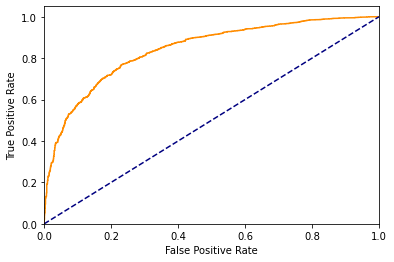

In [25]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [26]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

0.8417821244423714

## Support Vector Classifier

In [ ]:
# Support vector machine linear classifier
svc=SVC(kernel='linear', probability=True)
svc.fit(X_train_scaled, y_train)

In [ ]:
#printing the accuracy score
print(f'Training Score: {svc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {svc.score(X_test_scaled, y_test)}')

In [ ]:
#predection on the test set and confusion matrix
y_pred_svc=svc.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_svc)

In [ ]:
#classification report
print(classification_report(y_test, y_pred_svc))

In [ ]:
#roc curve
y_proba_svc = svc.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_svc)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

## Decision Tree 

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

In [ ]:
#printing the accuracy score
print(f'Training Score: {dt.score(X_train_scaled, y_train)}')
print(f'Testing Score: {dt.score(X_test_scaled, y_test)}')

In [ ]:
#predection on the test set and confusion matrix
y_pred_dt=svc.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_dt)

In [ ]:
#classification report
print(classification_report(y_test, y_pred_dt))

In [ ]:
features_dt = dt.feature_importances_
print(features_dt)
plt.bar(x = range(len(features_dt)), height=features_dt)
plt.show()

In [ ]:
#roc curve
y_proba_tree = dt.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_tree)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

## Bagging

## a. Random Forest Classifier
Instead of having one decision tree, we make more random trees and average their output.

In [ ]:
#Random Forest classifier model
rf=RandomForestClassifier(random_state=1, n_estimators=500)
rf.fit(X_train_scaled, y_train)

In [ ]:
#printing the accuracy score
print(f'Training Score: {rf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf.score(X_test_scaled, y_test)}')

In [ ]:
#predection on the test set and confusion matrix
y_pred_rf=rf.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_rf)

In [ ]:
#classification report
print(classification_report(y_test, y_pred_rf))

In [ ]:
features_rf = rf.feature_importances_
print(features_rf)
plt.bar(x = range(len(features_rf)), height=features_rf)
plt.show()

In [ ]:
#roc curve
y_proba_forest = rf.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_forest)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

## b. Extremely Random Trees
Changing the behavior of the decision trees so that they randomly choose their splits

In [ ]:
et = ExtraTreesClassifier(random_state=1, n_estimators=500)
et.fit(X_train_scaled, y_train)

In [ ]:
#printing the accuracy score
print(f'Training Score: {et.score(X_train_scaled, y_train)}')
print(f'Testing Score: {et.score(X_test_scaled, y_test)}')

In [ ]:
#predection on the test set and confusion matrix
y_pred_et=et.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_et)

In [ ]:
#classification report
print(classification_report(y_test, y_pred_et))

In [ ]:
features_et = et.feature_importances_
print(features_et)
plt.bar(x = range(len(features_et)), height=features_et)
plt.show()

In [ ]:
#roc curve
y_proba_rand_tree = et.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_rand_tree)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

## Bosting
In Bosting each new weak learner is trained on data that skews the training dataset to data points that the previous weak learners didn't estimate well.

In [ ]:
ab = AdaBoostClassifier(random_state=1, n_estimators=200, learning_rate=0.1)
ab.fit(X_train_scaled, y_train)

In [ ]:
#printing the accuracy score
print(f'Training Score: {ab.score(X_train_scaled, y_train)}')
print(f'Testing Score: {ab.score(X_test_scaled, y_test)}')

In [ ]:
#predection on the test set and confusion matrix
y_pred_ab=ab.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_ab)

In [ ]:
#classification report
print(classification_report(y_test, y_pred_ab))

In [ ]:
features_ab = ab.feature_importances_
print(features_ab)
plt.bar(x = range(len(features_ab)), height=features_ab)
plt.show()

In [ ]:
#roc curve
y_proba_ab = ab.predict_proba(X_test_scaled)[:,1]  #proba of positive class
fpr, tpr, thresholds = roc_curve(y_test_label, y_proba_ab)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# area under the curve (AUC)
roc_auc = auc(fpr, tpr)
roc_auc

## Trying to improve score by selecting important features based on Adaboster Classifier


In [ ]:
sel = SelectFromModel(ab)
sel.fit(X_train_scaled, y_train)

In [ ]:
sel.get_support()

In [ ]:
X_train_sel=sel.transform(X_train_dumy)
X_test_sel=sel.transform(X_test_dumy)

scaler = StandardScaler().fit(X_train_sel)
X_selected_train_scaled = scaler.transform(X_train_sel)
X_selected_test_scaled = scaler.transform(X_test_sel)


### Logistic Regression after selecting important features

In [ ]:
lr_s = LogisticRegression()
lr_s.fit(X_selected_train_scaled, y_train)

In [ ]:
#before model selection
print(f'Training Score: {lr.score(X_train_scaled, y_train)}')
print(f'Testing Score: {lr.score(X_test_scaled, y_test)}')

In [ ]:
#after model selection
print(f'Training Score: {lr_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {lr_s.score(X_selected_test_scaled, y_test)}')

### KNeighborsClassifier after selecting important features

In [ ]:
knn_s=KNeighborsClassifier(n_neighbors=3)
knn_s.fit(X_selected_train_scaled, y_train)

In [ ]:
#before model selection
print(f'Training Score: {knn.score(X_train_scaled, y_train)}')
print(f'Testing Score: {knn.score(X_test_scaled, y_test)}')

In [ ]:
#after model selection
print(f'Training Score: {knn_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {knn_s.score(X_selected_test_scaled, y_test)}')

### SVC after selecting important features

In [ ]:
# Support vector machine linear classifier
svc_s=SVC(kernel='linear')
svc_s.fit(X_selected_train_scaled, y_train)

In [ ]:
#before model selection
print(f'Training Score: {svc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {svc.score(X_test_scaled, y_test)}')

In [ ]:
#after model selection
print(f'Training Score: {svc_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {svc_s.score(X_selected_test_scaled, y_test)}')